In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
data=pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

### Decision tree

In [36]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

[Text(362.70000000000005, 380.52, 'X[1] <= 154.5\nentropy = 0.925\nsamples = 576\nvalue = [380, 196]'),
 Text(223.20000000000002, 271.8, 'X[5] <= 26.3\nentropy = 0.81\nsamples = 485\nvalue = [364, 121]'),
 Text(111.60000000000001, 163.07999999999998, 'X[5] <= 9.1\nentropy = 0.178\nsamples = 112\nvalue = [109, 3]'),
 Text(55.800000000000004, 54.360000000000014, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(167.4, 54.360000000000014, 'entropy = 0.078\nsamples = 104\nvalue = [103, 1]'),
 Text(334.8, 163.07999999999998, 'X[1] <= 103.5\nentropy = 0.9\nsamples = 373\nvalue = [255, 118]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.564\nsamples = 136\nvalue = [118, 18]'),
 Text(390.6, 54.360000000000014, 'entropy = 0.982\nsamples = 237\nvalue = [137, 100]'),
 Text(502.20000000000005, 271.8, 'X[5] <= 23.1\nentropy = 0.671\nsamples = 91\nvalue = [16, 75]'),
 Text(446.40000000000003, 163.07999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(558.0, 163.07999999999998, '

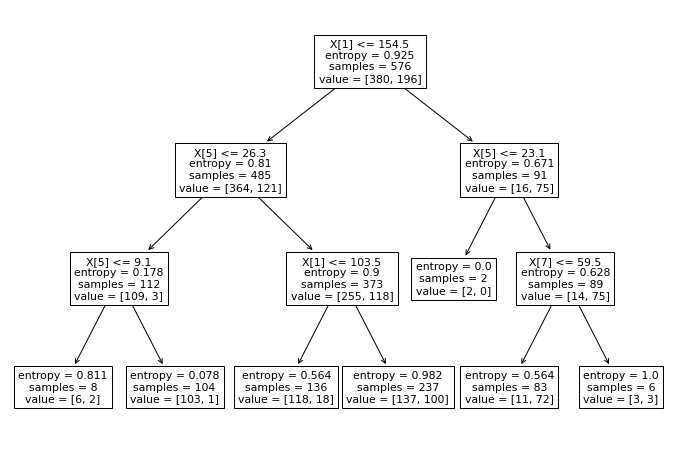

In [37]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(x_train, y_train)) 

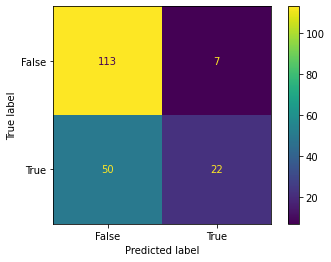

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [ ]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

### Random Forest

In [9]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = rf.feature_importances_

In [10]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

random forest accuracy: 0.7291666666666666


In [11]:
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Glucose                        0.273767
 2) BMI                            0.151843
 3) Age                            0.148843
 4) DiabetesPedigreeFunction       0.126161
 5) BloodPressure                  0.086856
 6) Pregnancies                    0.078976
 7) Insulin                        0.068358
 8) SkinThickness                  0.065196


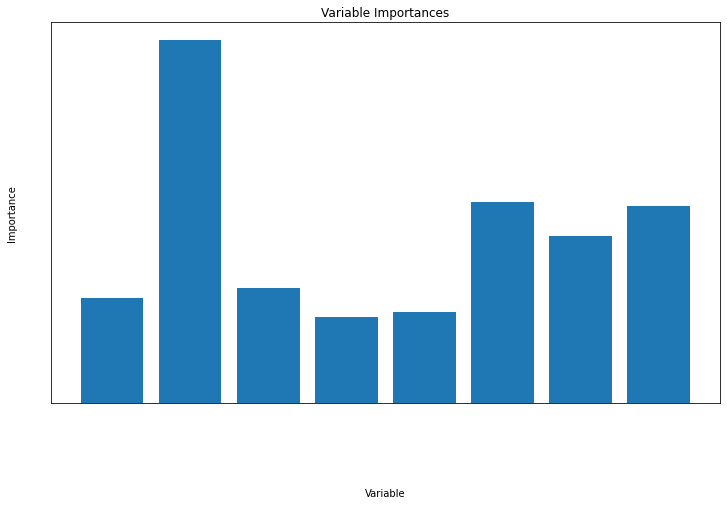

In [18]:
plt.figure(figsize=(12,7))
plt.tick_params(colors='white')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, list(data.columns)[0:8],rotation=30)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()